<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Tarea3/Ejercicio_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
#b)
X=np.linspace(-1, 1, 101)

@np.vectorize
def sgn(x):
  if x>0:
    return 1
  elif x==0:
    return 0
  else:
    return -1

y=sgn(X)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

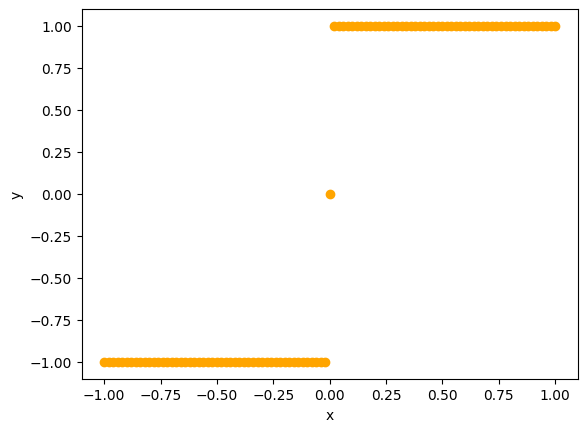

In [3]:
#c)
plt.scatter(X, y, color="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
def GetNewtonMethod(f,df,xn,itmax = 10000, precision=1e-14):

    error = 1.
    it = 0

    while error >= precision and it < itmax:

        try:

            xn1 = xn - f(xn)/df(xn)

            error = np.abs( (xn1-xn)/xn )
           # error = np.abs(f(xn)/df(xn))

        except ZeroDivisionError:
            print("zero division")

        xn  = xn1
        it += 1

    #print('Raiz:',xn,it)

    if it == itmax:
        return False
    else:
        return xn

def GetAllRoots(f,df,x, tolerancia=5):

    Roots = np.array([0])

    for i in x:

        root = GetNewtonMethod(f,df,i)

        if root != False:

            croot = np.round( root, tolerancia )

            if croot not in Roots:
                Roots = np.append( Roots, croot )

    # Ordenamos las raices
    Roots.sort()

    return Roots

def GetLegendre(n):

  x = sym.Symbol('x',Real=True)
  y = sym.Symbol('y',Real=True)

  y = (x**2 - 1)**n

  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))

  return p

In [5]:
#d)
Legendre = []
DLegendre = []

x = sym.Symbol('x',Real=True)
n=15

for i in range(n+1):

    poly = GetLegendre(i)

    Legendre.append(poly)
    DLegendre.append(sym.diff(poly,x))

def GetRootsPolynomial(n,xi,poly,dpoly):

    x = sym.Symbol('x',Real=True)
    pn = sym.lambdify([x],poly[n],'numpy')
    dpn = sym.lambdify([x],dpoly[n],'numpy')
    Roots = GetAllRoots(pn,dpn,xi)

    return Roots

xi = np.linspace(-1,1,100,dtype=np.longdouble)
Roots = GetRootsPolynomial(n,xi,Legendre,DLegendre)

<ipython-input-4-be751866f917>:55: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))
<ipython-input-4-be751866f917>:12: RuntimeWarning: invalid value encountered in scalar divide
  error = np.abs( (xn1-xn)/xn )


In [6]:
def Pesos (Roots, Derivfuncion, hasta):
  x=sym.Symbol('x',Real=True)

  pesos=[]

  dpn = sym.lambdify([x],Derivfuncion,'numpy')

  for i in range(len(Roots)):
    peso=2/((1-Roots[i]**2)*(Derivfuncion[hasta].subs(x,Roots[i])**2))
    peso=round(peso,11)
    pesos.append(peso)

  pesos.sort()
  return pesos

pesos=np.array(Pesos(Roots,DLegendre, 15))

In [7]:
raices, weights = np.polynomial.legendre.leggauss(15)
print(Roots)
print(raices)
print(pesos)
print(weights)

[-0.98799 -0.93727 -0.84821 -0.72442 -0.57097 -0.39415 -0.20119  0.
  0.20119  0.39415  0.57097  0.72442  0.84821  0.93727  0.98799]
[-0.98799252 -0.93727339 -0.84820658 -0.72441773 -0.57097217 -0.39415135
 -0.20119409  0.          0.20119409  0.39415135  0.57097217  0.72441773
  0.84820658  0.93727339  0.98799252]
[0.03075965408 0.03075965408 0.07036973142 0.07036973142 0.10715700767
 0.10715700767 0.13956971294 0.13956971294 0.16626981814 0.16626981814
 0.18616123416 0.18616123416 0.19843182684 0.19843182684 0.20257824193]
[0.03075324 0.07036605 0.10715922 0.13957068 0.16626921 0.186161
 0.19843149 0.20257824 0.19843149 0.186161   0.16626921 0.13957068
 0.10715922 0.07036605 0.03075324]


In [8]:
#e)
polinomiosl=[]
for i in range(20):
  polinomiosl.append(GetLegendre(i))
polinomiosl

<ipython-input-4-be751866f917>:55: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  p = sym.diff(y,x,n)/(2**n * np.math.factorial(n))


[1,
 x,
 (3*x**2 - 1)/2,
 x*(5*x**2 - 3)/2,
 (8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8,
 x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8,
 (16*x**6 + 120*x**4*(x**2 - 1) + 90*x**2*(x**2 - 1)**2 + 5*(x**2 - 1)**3)/16,
 x*(16*x**6 + 168*x**4*(x**2 - 1) + 210*x**2*(x**2 - 1)**2 + 35*(x**2 - 1)**3)/16,
 (128*x**8 + 1792*x**6*(x**2 - 1) + 3360*x**4*(x**2 - 1)**2 + 1120*x**2*(x**2 - 1)**3 + 35*(x**2 - 1)**4)/128,
 x*(128*x**8 + 2304*x**6*(x**2 - 1) + 6048*x**4*(x**2 - 1)**2 + 3360*x**2*(x**2 - 1)**3 + 315*(x**2 - 1)**4)/128,
 (256*x**10 + 5760*x**8*(x**2 - 1) + 20160*x**6*(x**2 - 1)**2 + 16800*x**4*(x**2 - 1)**3 + 3150*x**2*(x**2 - 1)**4 + 63*(x**2 - 1)**5)/256,
 x*(256*x**10 + 7040*x**8*(x**2 - 1) + 31680*x**6*(x**2 - 1)**2 + 36960*x**4*(x**2 - 1)**3 + 11550*x**2*(x**2 - 1)**4 + 693*(x**2 - 1)**5)/256,
 (1024*x**12 + 33792*x**10*(x**2 - 1) + 190080*x**8*(x**2 - 1)**2 + 295680*x**6*(x**2 - 1)**3 + 138600*x**4*(x**2 - 1)**4 + 16632*x**2*(x**2 - 1)**5 + 231*(x**2 - 1)**6)/1024,
 x

In [16]:
#f)
def coeficientes (X,n,f,poli,weights,roots):
  co=[]
  for i in range(n):
    base=(2*i+1)*0.5
    I=-sym.integrate(poli[i],(x,-1,0))+sym.integrate(poli[i],(x,0,1))
    total=I*base
    co.append(total)
  return co

coeficientesC=coeficientes (X, 20, sgn, polinomiosl, weights, raices)
coeficientesC

[0,
 1.50000000000000,
 0,
 -0.875000000000000,
 0,
 0.687500000000000,
 0,
 -0.585937500000000,
 0,
 0.519531250000000,
 0,
 -0.471679687500000,
 0,
 0.435058593750000,
 0,
 -0.405853271484375,
 0,
 0.381851196289063,
 0,
 -0.361667633056641]

In [17]:
#g)
def comb (X):
  combinacion=0
  general=[]
  for R in X:
    general.append(combinacion)
    combinacion=0
    for i in range(15):
      inicio=polinomiosl[i].subs(x,R)*coeficientesC[i]
      combinacion+=inicio
  return general

combinacion=comb(X)
combinacion

[0,
 -1.20947265625000,
 -0.950371850054447,
 -0.915521238614216,
 -0.965570274567668,
 -1.02603478863676,
 -1.06399724481361,
 -1.07137513512756,
 -1.05329497467824,
 -1.02036582785087,
 -0.983867832405374,
 -0.953061380296601,
 -0.933984789787448,
 -0.929245538513456,
 -0.938425258316903,
 -0.958814329214440,
 -0.986270445323870,
 -1.01605914895688,
 -1.04358503585462,
 -1.06496193734220,
 -1.07740052424385,
 -1.07941393071000,
 -1.07085748924095,
 -1.05282868391059,
 -1.02745901633994,
 -0.997631563083181,
 -0.966657392738853,
 -0.937941407940186,
 -0.914664183922812,
 -0.899501502869471,
 -0.894397959299132,
 -0.900405587688144,
 -0.917593221293420,
 -0.945027450286439,
 -0.980821771262128,
 -1.02224692258284,
 -1.06589255056061,
 -1.10786828159329,
 -1.14403098354523,
 -1.17022445653536,
 -1.18251794643290,
 -1.17743065277000,
 -1.15213072113577,
 -1.10459897270377,
 -1.03374972792395,
 -0.939503421796971,
 -0.822808178513665,
 -0.685610010129209,
 -0.530773729001149,
 -0.36195892

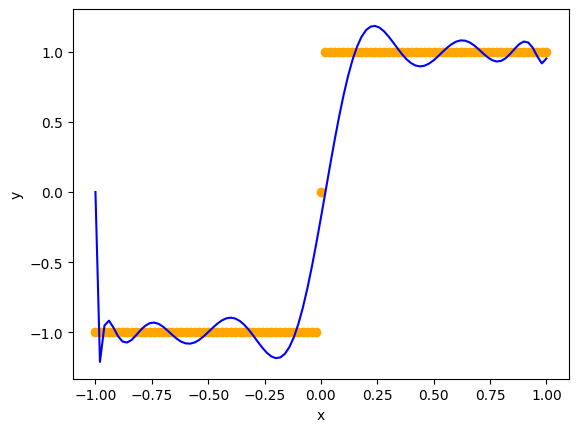

In [18]:
plt.scatter(X, y, color="orange")
plt.plot(X, combinacion, color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()